## Crime forecasting with NeuralProphet - using weather data and no optimization.

1. Importing libraries

In [29]:
import pandas as pd
from neuralprophet import NeuralProphet
import random   
import numpy as np
from neuralprophet import utils
random.seed(42)
np.random.seed(42)
utils.set_random_seed(seed=42)

2. Importing daily crime count with weather data.

<Axes: xlabel='ds'>

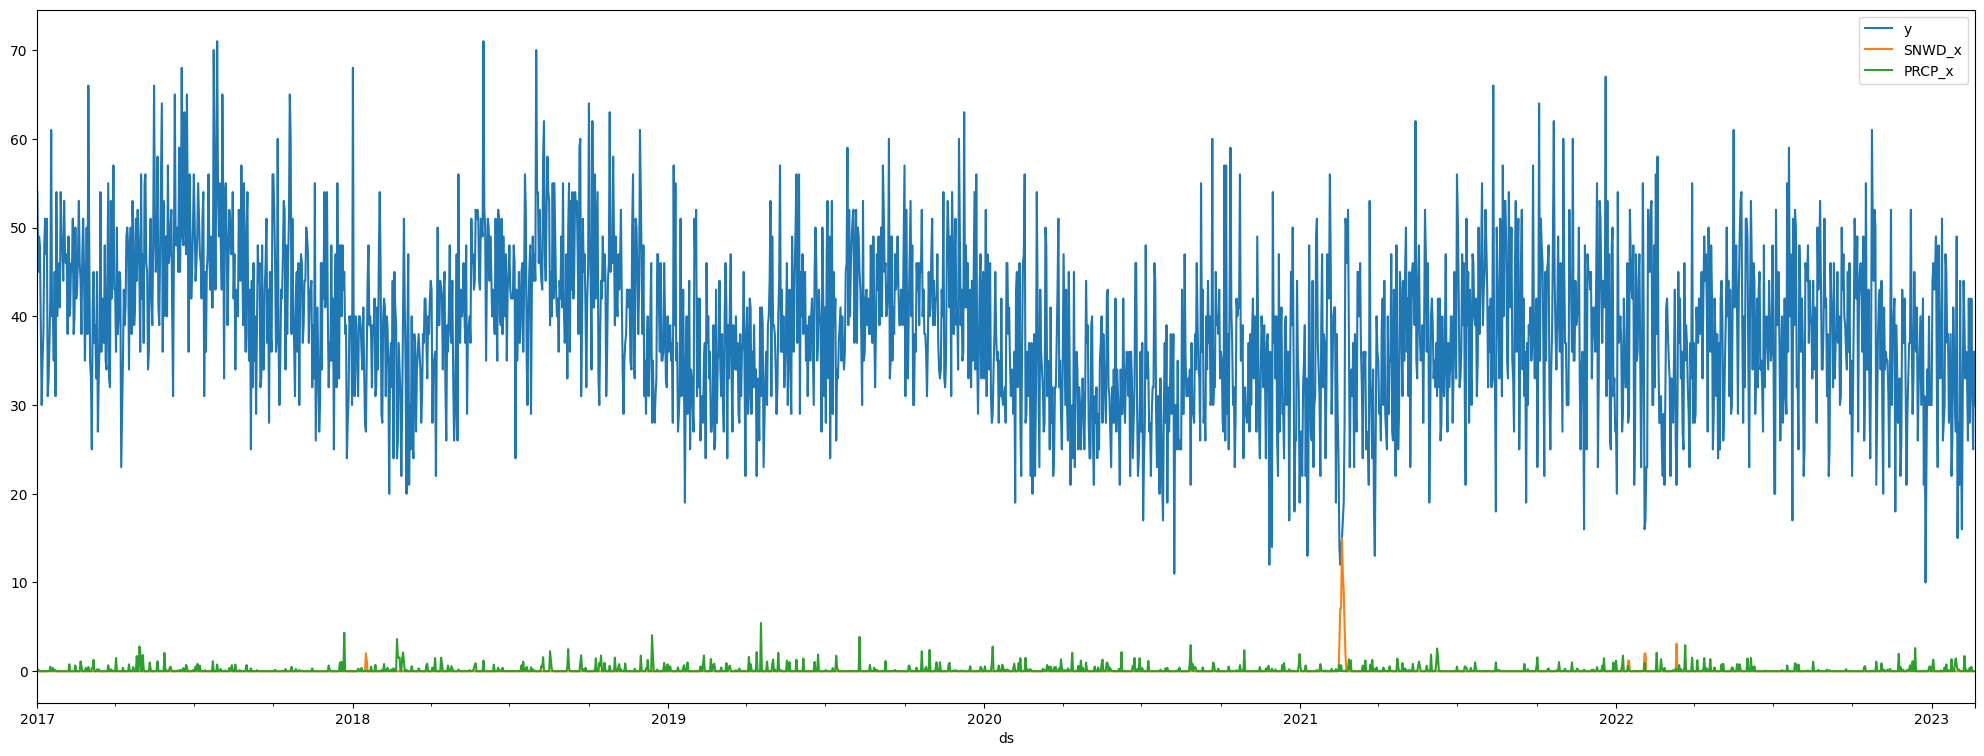

In [30]:
df2 = pd.read_csv("../../../data/daily-count-w-weather.csv")
df2 = df2[["ds", "y", "SNWD_x", "PRCP_x"]]
df2["ds"] = pd.to_datetime(df2["ds"])
df2.set_index('ds').plot(figsize=(25, 9))

In [31]:
train = df2[:int(0.8 * (len(df2)))]
test = df2[int(0.8 * (len(df2))):]
train.tail(), test.head()

(             ds   y  SNWD_x  PRCP_x
 1788 2021-11-24  33     0.0    0.00
 1789 2021-11-25  16     0.0    0.17
 1790 2021-11-26  48     0.0    0.00
 1791 2021-11-27  35     0.0    0.00
 1792 2021-11-28  25     0.0    0.00,
              ds   y  SNWD_x  PRCP_x
 1793 2021-11-29  47     0.0     0.0
 1794 2021-11-30  45     0.0     0.0
 1795 2021-12-01  45     0.0     0.0
 1796 2021-12-02  43     0.0     0.0
 1797 2021-12-03  45     0.0     0.0)

3. Fitting the NeuralProphet with default settings and weather data as additional regressor.

In [32]:
m = NeuralProphet()

m = m.add_country_holidays(country_name='US')
m = m.add_future_regressor("SNWD_x")
m = m.add_future_regressor("PRCP_x")

m.fit(train)
future = m.make_future_dataframe(train, periods=test.shape[0], regressors_df=test[["SNWD_x", "PRCP_x"]])
forecast = m.predict(future)
forecast_on_train = m.predict(train)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 163
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (57) is too small than the required number for the learning rate finder (231). The results might not be optimal.


Finding best initial lr:   0%|          | 0/231 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.777% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.777% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 57it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 57it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [33]:
forecast_on_train.head()

,ds,y,yhat1,trend,season_yearly,season_weekly,events_additive,event_Christmas Day,event_Christmas Day (Observed),event_Columbus Day,...,event_Memorial Day,event_New Year's Day,event_New Year's Day (Observed),event_Thanksgiving,event_Veterans Day,event_Veterans Day (Observed),event_Washington's Birthday,future_regressors_additive,future_regressor_PRCP_x,future_regressor_SNWD_x
0,2017-01-01,54,40.860443,45.446301,-1.167621,-5.454480,2.050845,0.0,0.0,0.0,...,0.0,2.050845,0.000000,0.0,0.0,0.0,0.0,-0.014605,-0.014605,0.0
1,2017-01-02,45,45.094875,45.461636,-1.213100,3.338269,-2.199833,0.0,0.0,0.0,...,0.0,0.000000,-2.199833,0.0,0.0,0.0,0.0,-0.292097,-0.292097,0.0
2,2017-01-03,49,44.676117,45.476971,-1.254454,0.453600,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,2017-01-04,48,44.845737,45.492306,-1.291530,0.644959,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,2017-01-05,39,45.210491,45.507645,-1.324218,1.027068,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


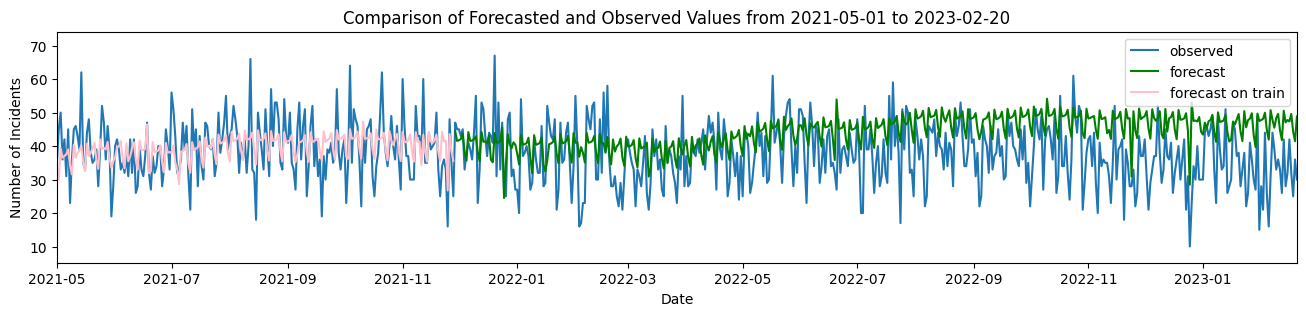

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(df2.ds, df2.y, label='observed')

plt.plot(forecast['ds'], forecast['yhat1'],
         label='forecast', color='green')
plt.plot(forecast_on_train['ds'], forecast_on_train['yhat1'],
         label='forecast on train', color='pink')
plt.title('Comparison of Forecasted and Observed Values from 2021-05-01 to ' + str(test.ds.iloc[-1])[:10])
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()

plt.xlim(pd.Timestamp('2021-05-01'), pd.Timestamp(test.ds.iloc[-1]))
plt.gcf().set_size_inches(16, 3)
plt.savefig('../neural-prophet-forecast.png')
plt.show()

In [35]:
test = test.merge(forecast[['ds', 'yhat1']], how='left', on='ds')

4. Outputting final metrics for the model.

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('R2: ', r2_score(y_pred=forecast.yhat1, y_true=df2.y[-len(forecast.yhat1):]))
rmse = mean_squared_error(y_pred=forecast.yhat1, y_true=df2.y[-len(forecast.yhat1):], squared=False)
print('RMSE: ', rmse)



R2:  -0.5064309056244205
RMSE:  11.14759566587566
